In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

%matplotlib inline
plt.style.use('seaborn-white')

<b>(a)</b>

In [4]:
df = pd.read_csv(r"C:\Users\shipa\OneDrive\Desktop\STAT 724\Ch12Ex13.csv", header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.961933,0.441803,-0.975005,1.417504,0.818815,0.316294,-0.024967,-0.063966,0.031497,-0.350311,...,-0.509591,-0.216725,-0.055506,-0.484449,-0.521581,1.949135,1.324335,0.468147,1.061100,1.655970
1,-0.292526,-1.139267,0.195837,-1.281121,-0.251439,2.511997,-0.922206,0.059543,-1.409645,-0.656712,...,1.700708,0.007290,0.099062,0.563853,-0.257275,-0.581781,-0.169887,-0.542304,0.312939,-1.284377
2,0.258788,-0.972845,0.588486,-0.800258,-1.820398,-2.058924,-0.064764,1.592124,-0.173117,-0.121087,...,-0.615472,0.009999,0.945810,-0.318521,-0.117889,0.621366,-0.070764,0.401682,-0.016227,-0.526553
3,-1.152132,-2.213168,-0.861525,0.630925,0.951772,-1.165724,-0.391559,1.063619,-0.350009,-1.489058,...,-0.284277,0.198946,-0.091833,0.349628,-0.298910,1.513696,0.671185,0.010855,-1.043689,1.625275
4,0.195783,0.593306,0.282992,0.247147,1.978668,-0.871018,-0.989715,-1.032253,-1.109654,-0.385142,...,-0.692998,-0.845707,-0.177497,-0.166491,1.483155,-1.687946,-0.141430,0.200778,-0.675942,2.220611


In [27]:
df = df.transpose()

In [28]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.961933,-0.292526,0.258788,-1.152132,0.195783,0.030124,0.085418,1.116610,-1.218857,1.267369,...,1.325041,-0.116171,-1.470146,-0.379272,-1.465006,1.075148,-1.226125,-3.056328,1.450658,0.717977
1,0.441803,-1.139267,-0.972845,-2.213168,0.593306,-0.691014,-1.113054,1.341700,-1.277279,-0.918349,...,0.740838,-0.162392,-0.633375,-0.895521,2.034465,3.003267,-0.501702,0.449889,1.310348,0.763482
2,-0.975005,0.195837,0.588486,-0.861525,0.282992,-0.403426,-0.677969,0.103278,-0.558925,-1.253500,...,-0.435533,-0.235912,1.446660,-1.127459,0.440849,-0.123441,-0.717430,1.880362,0.383837,0.313576
3,1.417504,-1.281121,-0.800258,0.630925,0.247147,-0.729859,-0.562929,0.390963,-1.344493,-1.067114,...,-3.065529,1.597294,0.737478,-0.631248,-0.530442,-1.036740,-0.169113,-0.742841,-0.408860,-0.326473
4,0.818815,-0.251439,-1.820398,0.951772,1.978668,-0.364099,0.938194,-1.927491,1.159115,-0.240638,...,-2.378938,-0.086946,-0.122342,1.418029,1.075337,-1.270604,0.599530,2.238346,-0.471111,-0.158700


<b>(b)</b>

In [29]:
Z_lin = linkage(df, method="complete", metric="correlation")

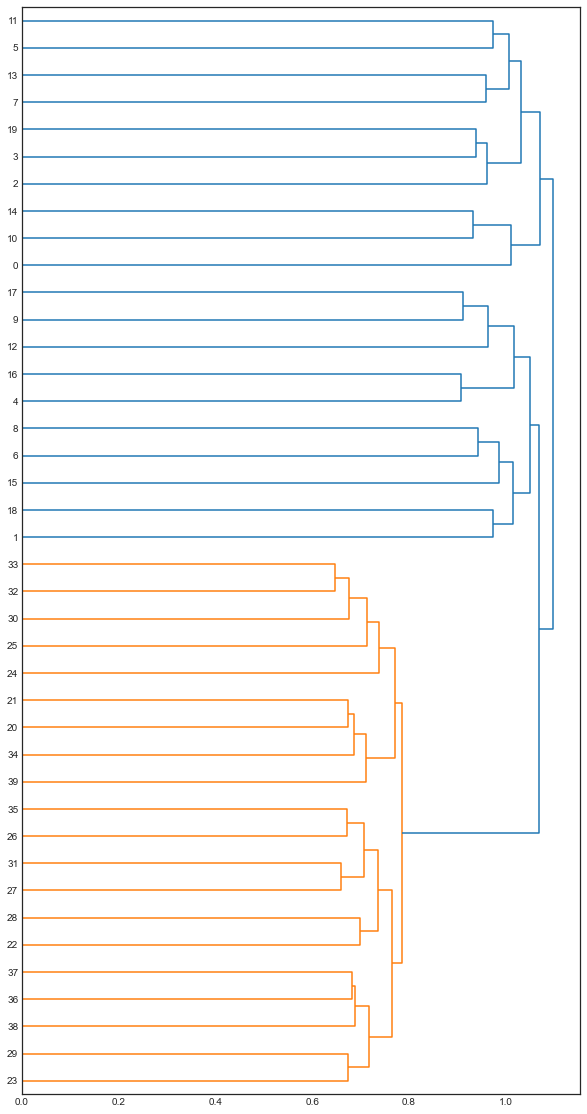

In [38]:
fig = plt.figure(figsize=(10, 20))
dn = dendrogram(Z_lin, orientation='right',labels=list(df.index.values), leaf_font_size=10, color_threshold=0.8)
plt.show()

The samples are seperated into the two groups. The blue side contains all of the healthy patients, because the values corresponding to the blue side are all less than 20. The orange side has all values greater than or equal to 20, meaning the orange cluster is the cluster for the unhealthy patients.

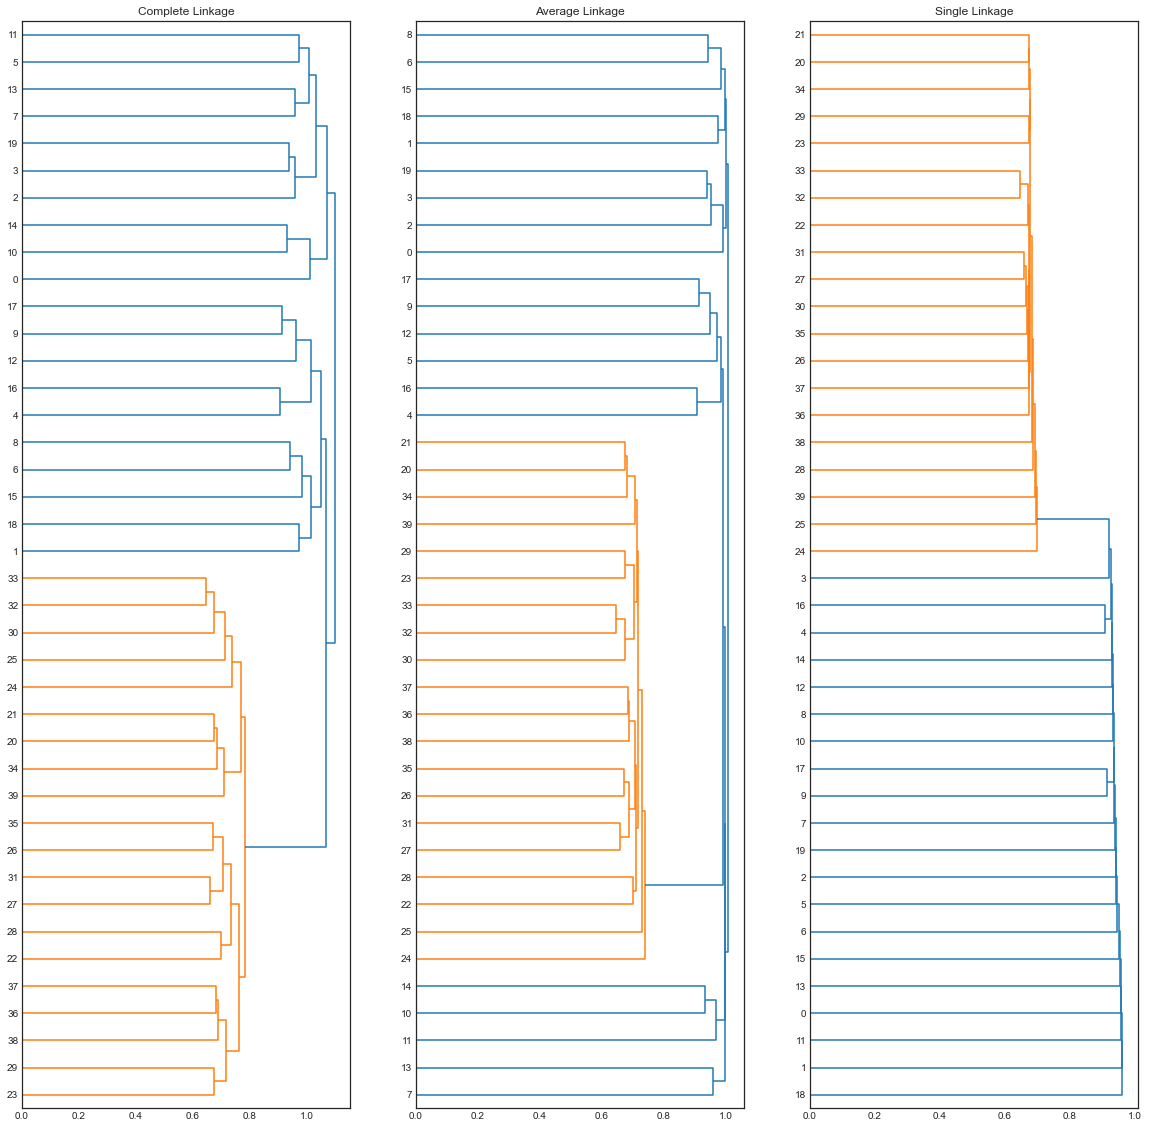

In [42]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,20))

for lnk, cluster, ax in zip([linkage(df, method="complete", metric="correlation"), linkage(df, method="average", metric="correlation"), linkage(df, method="single", metric="correlation")],
                                ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(lnk, labels=list(df.index.values), orientation='right', color_threshold=0.8, leaf_font_size=10, ax=ax)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');

The complete and single linkage methods properly grouped the two types of samples eventhough they do have different shapes. The average linkage method managed to group all the unhealthy samples together. However, this method created two different clusters for all of the healthy patients.

<b>(c)</b>

To answer this, we will first seperate out the healthy patients from the unhealthy once. Then, we will apply pca to both groups to see along which genes, there are the largest variance. These will be the genes that contribute most to the first PCA.

In [49]:
healthy = df.iloc[:20,]
unhealthy = df.iloc[20:,]
# healthy.head()

In [76]:
from sklearn import preprocessing
healthy_scaled = pd.DataFrame(preprocessing.scale(healthy),columns = df.columns)
unhealthy_scaled = pd.DataFrame(preprocessing.scale(unhealthy),columns = df.columns)

In [58]:
pca = PCA(n_components=1)
pca.fit_transform(healthy_scaled)

array([[ -5.6046345 ],
       [ -3.43075238],
       [  0.45106707],
       [-12.93245617],
       [ 14.90433793],
       [  3.75252188],
       [  3.58526106],
       [  1.59639942],
       [ -3.75778581],
       [  1.63934383],
       [-12.30926522],
       [  0.02439145],
       [  0.41783881],
       [  4.72709769],
       [ -4.12933046],
       [ -7.47582202],
       [ 18.93338123],
       [  8.68677007],
       [-11.73173809],
       [  2.65337422]])

In [83]:
max_comp = 0
for i in range(1000):
    if abs(pd.DataFrame(pca.components_,columns=healthy_scaled.columns,index = ['PC-1'])[i][0]) > max_comp:
        max_comp = abs(pd.DataFrame(pca.components_,columns=healthy_scaled.columns,index = ['PC-1'])[i][0])
        max_ind = i

In [84]:
pca2 = PCA(n_components=1)
pca2.fit_transform(unhealthy_scaled)
max_comp2 = 0
for i in range(1000):
    if abs(pd.DataFrame(pca2.components_,columns=unhealthy_scaled.columns,index = ['PC-1'])[i][0]) > max_comp2:
        max_comp2 = abs(pd.DataFrame(pca.components_,columns=unhealthy_scaled.columns,index = ['PC-1'])[i][0])
        max_ind2 = i

In [85]:
print(max_comp, max_ind)

0.08978784492362364 163


In [86]:
print(max_comp2, max_ind2)

0.07430184639434277 796


So for the healthy patients, the index corresponding to the gene that contributes most to PC-1 is 163. For the unhealthy patients, it is 796.